In [3]:
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Import our adaptive module:
adaptive_SEIR_ = __import__('adaptive_SEIR', globals=None, locals=None, fromlist=(), level=0)
Adaptive = adaptive_SEIR_.Adaptive_SEIR

### Examples to initialize

In [4]:
# ================================================== #
# Perform a simulation
mu = 0
gamma = 0.08
beta = 0.25
phi = 0
kappa = 0.15

### Simulation parameters
t_max = 100
steps = 100
x00 = [9990, 10, 0, 0]
N = sum(x00)

### Adaptive parameters

# Quadratic Utility functions:

b_s = 20 # Making the max utility attained at b_s/2
b_e = 16
b_i = 4
b_z = 12
a_s = 0
a_e = 0
a_i = 0
a_z = 0
nu = 0.25
tau = 12
delta = 0.99986

# ================================================== #

# Immediate rewards: (Utility functions)
def u_s(a):
    return ((b_s*a - a**2)**nu) - a_s
def u_e(a):
    return ((b_e*a - a**2)**nu) - a_e
def u_i(a):
    return (b_i*a - a**2)**nu - a_i
def u_z(a):
    return (b_z*a - a**2)**nu - a_z

### Simulation parameters
t_max = 250
steps = 100
x00 = [9990, 10, 1, 0]

In [5]:
# Initialize adaptive instances
instance_adaptive = Adaptive(
    mu, gamma, beta, phi, kappa, 
    tau, delta,
    u_s, u_e, u_i, u_z,
    t_max, steps, x00, max_contacts=30,
    logs=False, verbose=False, compute_max_t_threshold=1e-6)
start = time.time()
instance_adaptive.patch_uni_solutions()
end = time.time()
print(f"Running the adaptive algorithm took {(end - start)/60} minutes.")

100%|██████████| 250/250 [00:13<00:00, 18.14it/s]

Running the adaptive algorithm took 0.23079180320103962 minutes.


### Display history of optimal contacts selected

100%|██████████| 250/250 [00:00<00:00, 10589.22it/s]

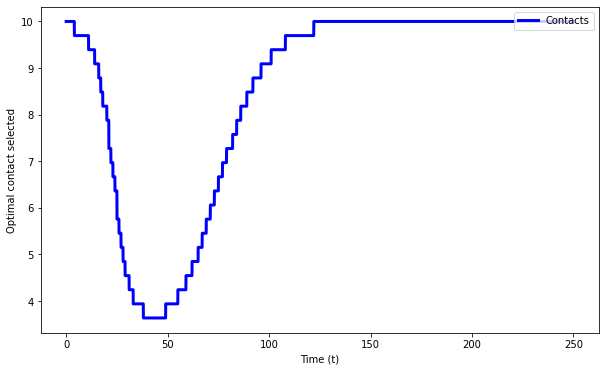

In [7]:
instance_adaptive.plot_C(instance_adaptive.cs_history)

### Plot solution of the system through time

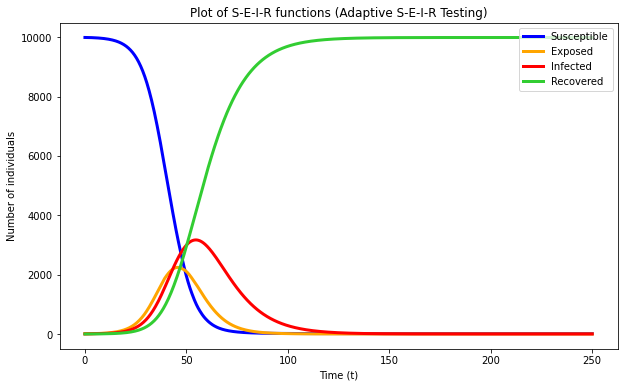

In [8]:
t = np.linspace(0, instance_adaptive.t_max, len(instance_adaptive.S))
instance_adaptive.plot_ode_solution(t = t, title = 'Adaptive S-E-I-R Testing')

  0%|          | 0/250 [00:00<?, ?it/s]

100%|██████████| 250/250 [00:16<00:00, 14.91it/s]


Running the adaptive algorithm took 0.27958398262659706 minutes.


100%|██████████| 250/250 [00:00<00:00, 11930.69it/s]


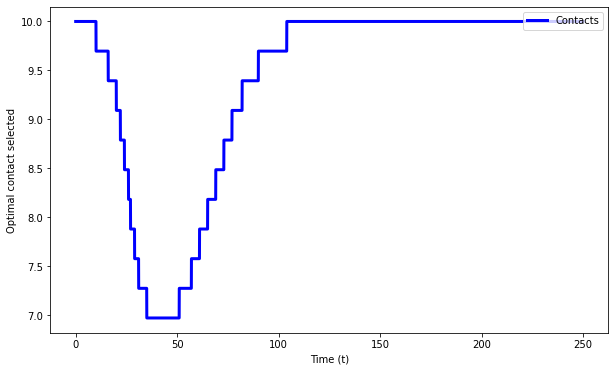

In [11]:
nu = 0.75

# Immediate rewards: (Utility functions)
def u_s(a):
    return ((b_s*a - a**2)**nu)*((b_s*a - a**2)**nu) - a_s
def u_e(a):
    return ((b_e*a - a**2)**nu)*((b_e*a - a**2)**nu) - a_e
def u_i(a):
    return (b_i*a - a**2)**nu - a_i
def u_z(a):
    return (b_z*a - a**2)**nu - a_z

# Initialize adaptive instances
instance_adaptive2 = Adaptive(
    mu, gamma, beta, phi, kappa, 
    tau, delta,
    u_s, u_e, u_i, u_z,
    t_max, steps, x00, max_contacts=30,
    logs=False, verbose=False, compute_max_t_threshold=1e-6)
start = time.time()
instance_adaptive2.patch_uni_solutions()
end = time.time()
print(f"Running the adaptive algorithm took {(end - start)/60} minutes.")

instance_adaptive2.plot_C(instance_adaptive2.cs_history)